In [1]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, RandomSampler

In [20]:
# 데이터 변환 함수 정의
transform_data = transforms.Compose([
    transforms.RandomResizedCrop((32, 32), scale=(0.05, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# 학습 데이터 세트 정의
trainset = datasets.CIFAR10(root='./data',
                            train=True,
                            download=False,
                            transform=transform_data)

# 데이터 샘플러 정의(??:샘플러는 어떤 역할을 하는 거야?)
train_sampler = RandomSampler(trainset)

# 데이터 로더 정의
train_loader = DataLoader(trainset,
                          sampler=train_sampler,
                          batch_size=32,
                          num_workers=4,
                          pin_memory=True)

images, labels = next(iter(train_loader))

### 첫 번째 iteration 데이터 확인

In [21]:
images.shape, labels.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

### 데이터 확인

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# 차원의 값이 1인 차원을 삭제한다.
label_names = ['airplane', 'automibile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = 0
print(images[index].shape)
torch_image = torch.squeeze(images[index])
print(torch_image.shape)
torch_image = torch_image.permute(1, 2, 0)
image = torch_image.numpy()
print(image.shape)

torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


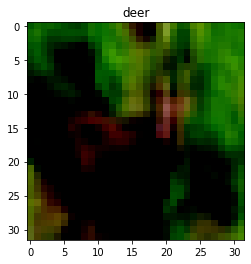

In [28]:
plt.title(label_names[labels[0].numpy()])
plt.imshow(image)
plt.show()